<a href="https://colab.research.google.com/github/salindhakal/Rating-Prediction/blob/master/player_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

data = pd.read_csv('/content/drive/MyDrive/player-data-full.csv')


data.head()


Mounted at /content/drive


<ipython-input-1-8ee0297e8b8c>:6: DtypeWarning: Columns (73) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/player-data-full.csv')


,player_id,version,name,full_name,description,image,height_cm,weight_kg,dob,positions,...,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,play_styles
0,239085,2024-07-08,Erling Haaland,Erling Braut Haaland,"Erling Haaland (Erling Braut Haaland, born 21 ...",https://cdn.sofifa.net/players/239/085/24_120.png,195,94,2000-07-21,ST,...,87,38,47,29,7,14,13,11,7.0,"Acrobatic +,Power Header,Quick Step"
1,231747,2024-07-08,Kylian Mbappé,Kylian Mbappé Lottin,"Kylian Mbappé (Kylian Mbappé Lottin, born 20 D...",https://cdn.sofifa.net/players/231/747/24_120.png,182,75,1998-12-20,"ST,LW",...,88,26,34,32,13,5,7,11,6.0,"Quick Step +,Finesse Shot,Rapid,Flair,Trivela,..."
2,192985,2024-07-08,Kevin De Bruyne,Kevin De Bruyne,Kevin De Bruyne (born 28 June 1991) is a Belgi...,https://cdn.sofifa.net/players/192/985/24_120.png,181,75,1991-06-28,"CM,CAM",...,88,66,70,53,15,13,5,10,13.0,"Incisive Pass +,Dead Ball,Pinged Pass,Long Bal..."
3,231866,2024-07-08,Rodri,Rodrigo Hernández Cascante,Rodri (born 22 June 1996) is a Spanish footbal...,https://cdn.sofifa.net/players/231/866/24_120.png,191,82,1996-06-22,"CDM,CM",...,90,92,87,78,10,10,7,14,8.0,"Power Shot +,Long Ball Pass,Bruiser,Aerial,Lon..."
4,202126,2024-07-08,Harry Kane,Harry Kane,Harry Kane (born 28 July 1993) is a British fo...,https://cdn.sofifa.net/players/202/126/24_120.png,188,85,1993-07-28,ST,...,92,46,46,38,8,10,11,14,11.0,"Incisive Pass +,Long Ball Pass,First Touch,Tri..."


In [2]:
# libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import VotingRegressor



Now, carrying out the EDA


In [3]:

data.describe()


,player_id,height_cm,weight_kg,overall_rating,potential,weak_foot,skill_moves,international_reputation,club_id,club_league_id,...,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_reflexes
count,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18632.000000,18632.000000,...,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18632.000000
mean,235029.915999,181.710296,75.197479,65.863559,70.942967,2.939069,2.380540,1.084802,48653.826964,320.384285,...,54.447346,47.791253,57.951832,46.632917,48.416373,46.210403,16.321104,16.131368,16.015273,16.387827
std,44529.978593,6.895580,6.975470,6.796113,6.231746,0.680590,0.772224,0.359449,54522.306790,620.802625,...,13.429803,15.775807,12.254935,20.453263,21.135608,20.625587,17.580676,16.957622,16.724389,17.872586
min,18115.000000,155.000000,51.000000,47.000000,49.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,10.000000,8.000000,10.000000,3.000000,5.000000,5.000000,2.000000,2.000000,3.000000,3.000000
25%,222406.250000,177.000000,70.000000,62.000000,67.000000,3.000000,2.000000,1.000000,462.000000,20.000000,...,45.000000,38.000000,51.000000,29.000000,29.000000,26.000000,8.000000,8.000000,8.000000,8.000000
50%,243956.500000,182.000000,75.000000,66.000000,71.000000,3.000000,2.000000,1.000000,1919.000000,60.000000,...,56.000000,49.000000,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000
75%,263765.750000,187.000000,80.000000,70.000000,75.000000,3.000000,3.000000,1.000000,111132.000000,330.000000,...,64.000000,59.000000,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000
max,279948.000000,206.000000,105.000000,91.000000,94.000000,5.000000,5.000000,5.000000,131474.000000,2149.000000,...,95.000000,92.000000,96.000000,92.000000,91.000000,90.000000,90.000000,90.000000,91.000000,93.000000


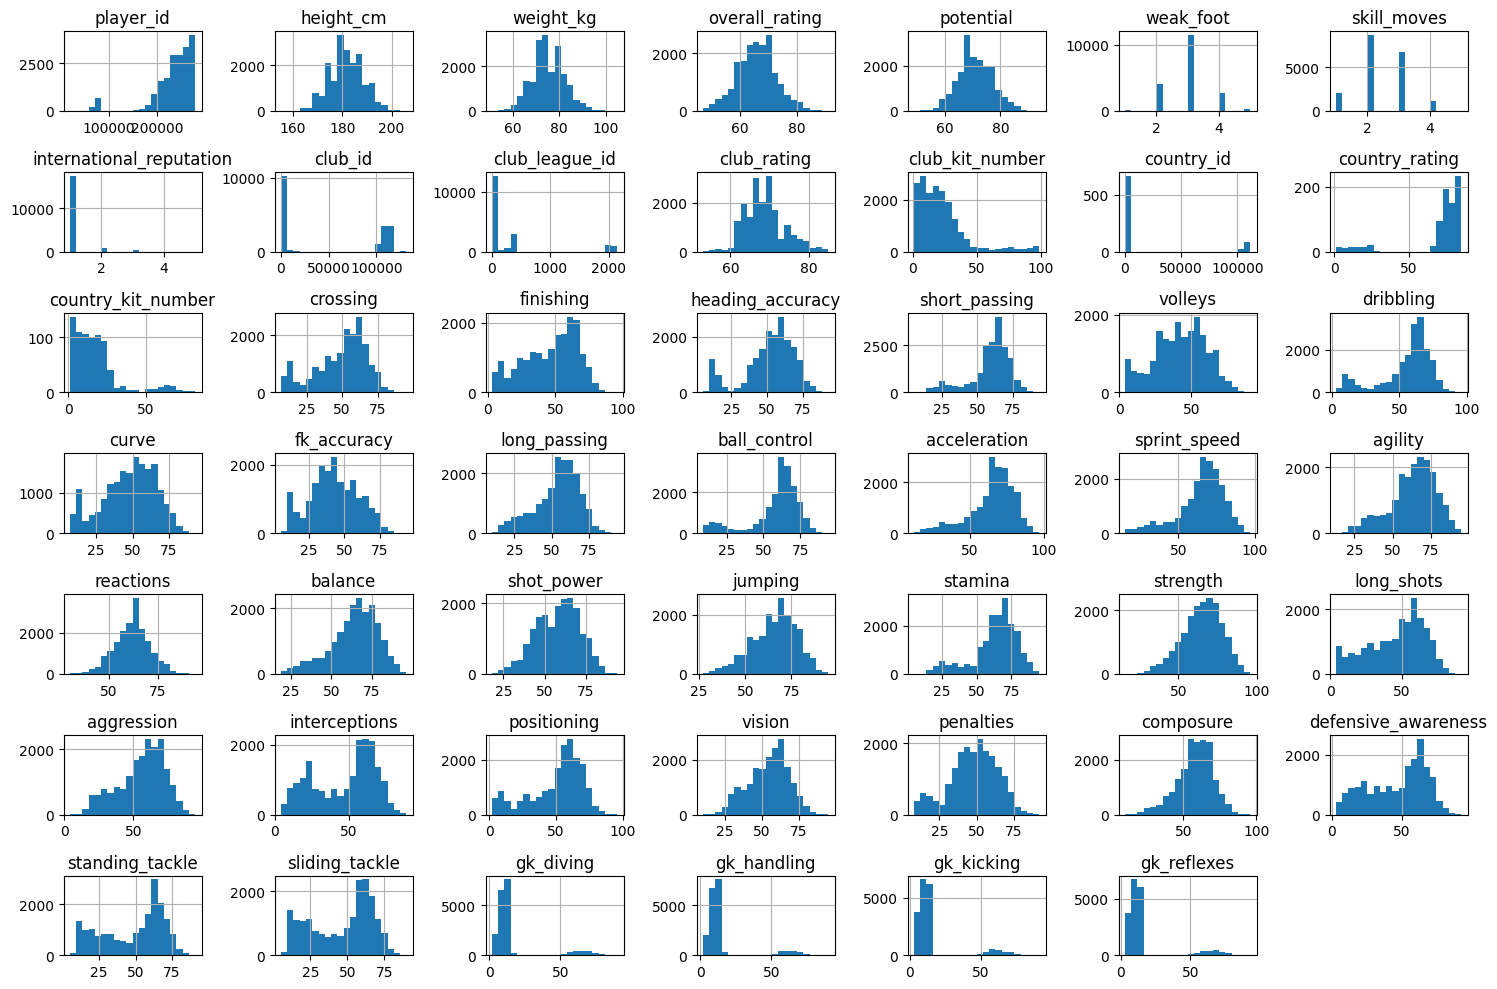

In [4]:
import matplotlib.pyplot as plt

#histograms for all features
data.hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()




In [5]:
# Dropping columns that i dont need for this model
unused_columns = ['player_id','value','wage','gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','release_clause','club_position','country_name','country_flag','country_position','full_name','real_face','country_league_id','country_league_name','dob','image','description','positions','preferred_foot','club_name','body_type','specialities','club_league_name','club_logo','club_joined','club_contract_valid_until','club_rating' , 'work_rate','play_styles', 'club_id', 'club_league_id', 'potential', 'weak_foot', 'skill_moves', 'international_reputation','version','name','height_cm','weight_kg','country_rating','club_kit_number','country_id','country_rating','country_kit_number']
data_cleaned = data.drop(columns=unused_columns)

#Cleaned dataset verification
data_cleaned.head()



,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle
0,91,47,96,83,77,90,79,77,62,63,...,86,87,43,96,74,86,87,38,47,29
1,91,78,94,73,86,84,93,80,69,71,...,83,64,38,93,83,84,88,26,34,32
2,91,95,85,55,94,83,86,92,83,94,...,92,75,66,88,95,83,88,66,70,53
3,90,71,74,81,92,68,84,83,63,90,...,88,85,84,76,84,62,90,92,87,78
4,90,80,95,89,87,89,82,82,65,88,...,87,80,42,94,87,92,92,46,46,38


In [6]:
data_cleaned.describe()

,overall_rating,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,fk_accuracy,long_passing,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,defensive_awareness,standing_tackle,sliding_tackle
count,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,...,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000,18726.000000
mean,65.863559,49.333333,46.524885,51.784631,59.157855,42.537168,55.961070,47.894692,42.822706,53.810531,...,46.744900,55.926626,47.042241,50.635213,54.447346,47.791253,57.951832,46.632917,48.416373,46.210403
std,6.796113,17.843738,19.788316,17.336220,14.316979,17.662366,18.742047,17.961113,16.974699,14.629304,...,19.429223,16.802888,20.688003,19.746172,13.429803,15.775807,12.254935,20.453263,21.135608,20.625587
min,47.000000,7.000000,3.000000,5.000000,5.000000,4.000000,3.000000,7.000000,5.000000,10.000000,...,4.000000,4.000000,4.000000,2.000000,10.000000,8.000000,10.000000,3.000000,5.000000,5.000000
25%,62.000000,39.000000,31.000000,44.000000,55.000000,30.000000,51.000000,36.000000,31.000000,45.000000,...,32.000000,45.000000,26.000000,40.000000,45.000000,38.000000,51.000000,29.000000,29.000000,26.000000
50%,66.000000,53.000000,51.000000,55.000000,62.000000,44.000000,62.000000,50.000000,42.000000,57.000000,...,51.000000,59.000000,54.000000,56.000000,56.000000,49.000000,59.000000,52.000000,56.000000,53.000000
75%,70.000000,63.000000,62.000000,64.000000,68.000000,56.000000,68.000000,61.000000,55.000000,64.000000,...,62.000000,68.000000,64.000000,65.000000,64.000000,59.000000,66.000000,63.000000,65.000000,63.000000
max,91.000000,95.000000,96.000000,93.000000,94.000000,91.000000,96.000000,93.000000,94.000000,94.000000,...,92.000000,95.000000,89.000000,96.000000,95.000000,92.000000,96.000000,92.000000,91.000000,90.000000


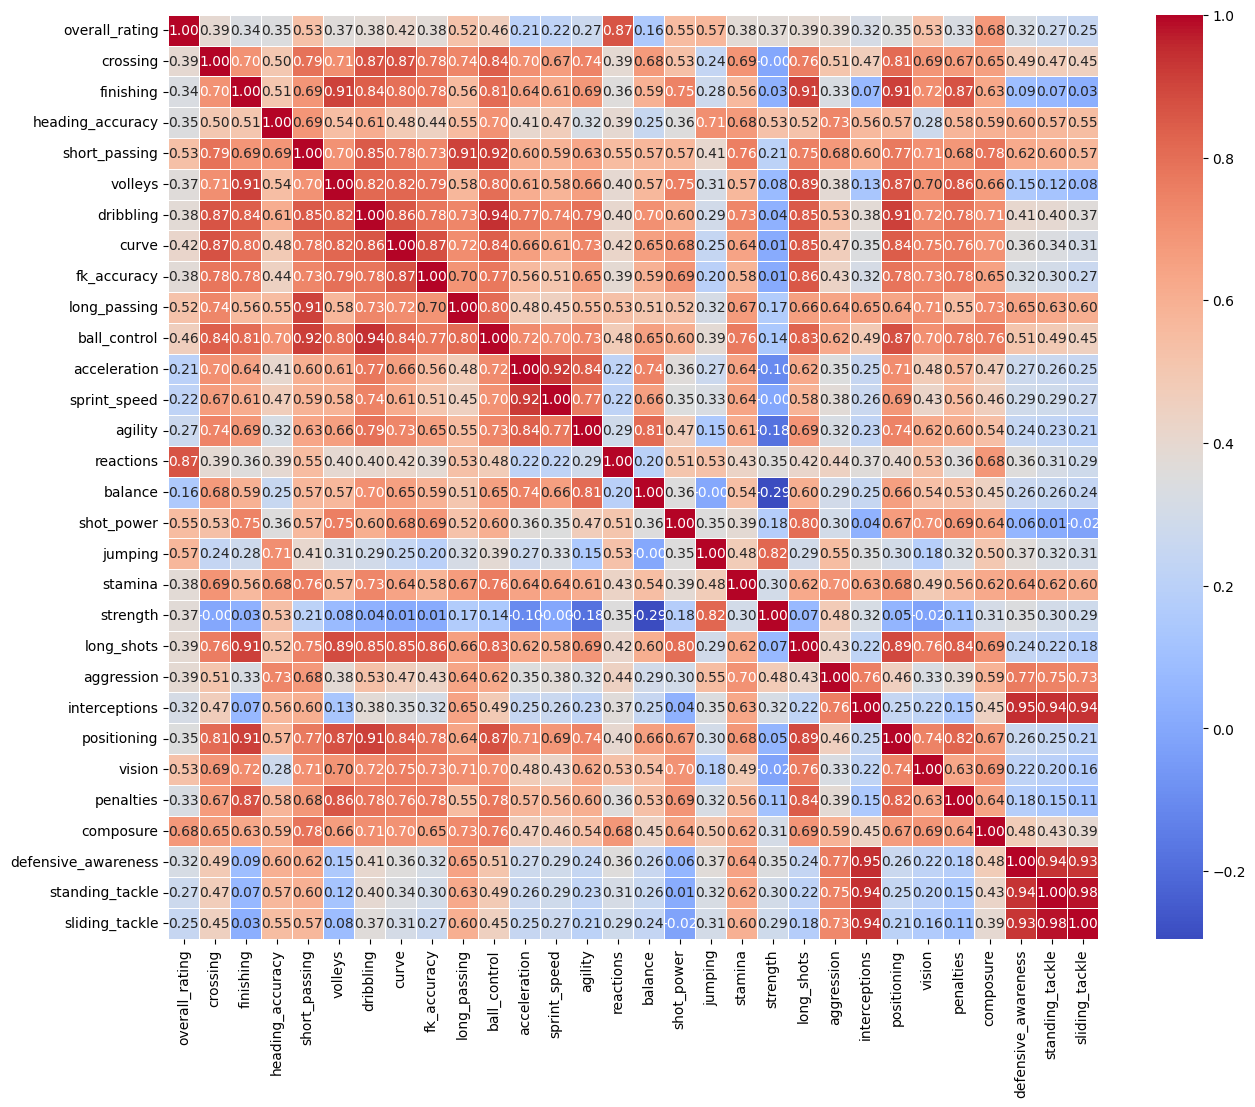

In [7]:
import seaborn as sns

# correlation matrix
corr_matrix = data_cleaned.corr()

# heatmap to visualize correlations
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


In [8]:

data_cleaned.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18726 entries, 0 to 18725
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   overall_rating       18726 non-null  int64
 1   crossing             18726 non-null  int64
 2   finishing            18726 non-null  int64
 3   heading_accuracy     18726 non-null  int64
 4   short_passing        18726 non-null  int64
 5   volleys              18726 non-null  int64
 6   dribbling            18726 non-null  int64
 7   curve                18726 non-null  int64
 8   fk_accuracy          18726 non-null  int64
 9   long_passing         18726 non-null  int64
 10  ball_control         18726 non-null  int64
 11  acceleration         18726 non-null  int64
 12  sprint_speed         18726 non-null  int64
 13  agility              18726 non-null  int64
 14  reactions            18726 non-null  int64
 15  balance              18726 non-null  int64
 16  shot_power           1

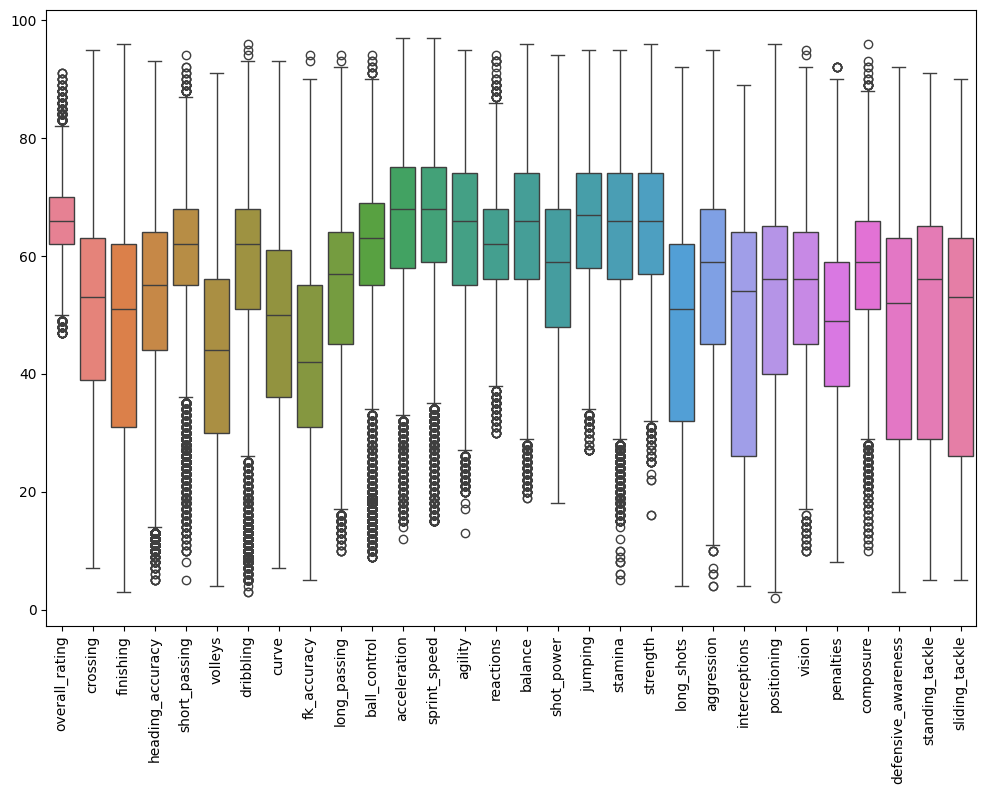

In [9]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_cleaned)
plt.xticks(rotation=90)
plt.show()


In [10]:
# features (independent variables) and target variable (dependent variable)
selected_features = [
    'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
    'dribbling', 'curve', 'fk_accuracy', 'long_passing', 'ball_control',
     'reactions','jumping', 'stamina', 'strength', 'positioning', 'vision', 'composure',
    'interceptions', 'defensive_awareness'
]

# independent variables (features)selected for the model
X = data_cleaned[selected_features]

#dependent variable (target) 'overall_rating'
y = data_cleaned['overall_rating']


In [11]:
from sklearn.impute import SimpleImputer

# Imputing missing values using median
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Verifying that missing values are handled
print(X_imputed.isnull().sum())


crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
fk_accuracy            0
long_passing           0
ball_control           0
reactions              0
jumping                0
stamina                0
strength               0
positioning            0
vision                 0
composure              0
interceptions          0
defensive_awareness    0
dtype: int64


In [12]:
from sklearn.preprocessing import StandardScaler

# Normalizing the data (zero mean, unit variance)
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_imputed), columns=X_imputed.columns)

# Checking the transformed data
print(X_scaled.head())


   crossing  finishing  heading_accuracy  short_passing   volleys  dribbling  \
0 -0.130768   2.500285          1.800635       1.246256  2.687301   1.229297   
1  1.606582   2.399213          1.223792       1.874897  2.347587   1.976301   
2  2.559323   1.944387          0.185476       2.433689  2.290968   1.602799   
3  1.214277   1.388488          1.685266       2.293991  1.441682   1.496084   
4  1.718669   2.449749          2.146740       1.944746  2.630682   1.389369   

      curve  fk_accuracy  long_passing  ball_control  reactions   jumping  \
0  1.620506     1.129788      0.628172      1.398779   3.627741  2.277133   
1  1.787538     1.542177      1.175034      2.001186   3.515273  1.859639   
2  2.455666     2.366956      2.747263      2.001186   3.402805  0.607160   
3  1.954570     1.188700      2.473832      1.880705   3.515273  1.442146   
4  1.898892     1.306526      2.337116      1.699983   3.515273  1.776141   

    stamina  strength  positioning    vision  composure 

TRAIN TEST SPLIT

In [13]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Checking the shapes of the splits
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)


Training data shape: (14980, 19)
Test data shape: (3746, 19)


*MODEL TRAINING*

In [14]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)  # Training the model
y_pred_linear = linear_model.predict(X_test)  # Predicting on test data

# Evaluation
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)
print("Linear Regression - MSE:", mse_linear)
print("Linear Regression - R² Score:", r2_linear)


Linear Regression - MSE: 7.562068482954483
Linear Regression - R² Score: 0.8338773855156841


In [15]:
# Random Forest
random_forest_model = RandomForestRegressor()
random_forest_model.fit(X_train, y_train)
y_pred_rf = random_forest_model.predict(X_test)

# Evaluation
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest - MSE:", mse_rf)
print("Random Forest - R² Score:", r2_rf)


Random Forest - MSE: 2.804023278163374
Random Forest - R² Score: 0.9384015525522733


In [16]:
# Decision Tree
decision_tree_model = DecisionTreeRegressor()
decision_tree_model.fit(X_train, y_train)
y_pred_dt = decision_tree_model.predict(X_test)

# Evaluation
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print("Decision Tree - MSE:", mse_dt)
print("Decision Tree - R² Score:", r2_dt)


Decision Tree - MSE: 6.495194874532835
Decision Tree - R² Score: 0.8573143371321387


In [17]:
# XGBoost
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print("XGBoost - MSE:", mse_xgb)
print("XGBoost - R² Score:", r2_xgb)


XGBoost - MSE: 2.7080130884962887
XGBoost - R² Score: 0.9405106902122498


In [18]:
# Support Vector Regressor
svr_model = SVR()
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)

# Evaluation
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("Support Vector Regressor - MSE:", mse_svr)
print("Support Vector Regressor - R² Score:", r2_svr)


Support Vector Regressor - MSE: 2.3661011673968853
Support Vector Regressor - R² Score: 0.9480217730177453


In [19]:
# Defining the ensemble
voting_model = VotingRegressor([
    ('Linear Regression', linear_model),
    ('Random Forest', random_forest_model),
    ('Decision Tree', decision_tree_model),
    ('XGBoost', xgb_model),
    ('SVR', svr_model)
])


In [20]:
# Training the ensemble model
voting_model.fit(X_train, y_train)


VotingRegressor(estimators=[('Linear Regression', LinearRegression()),
                            ('Random Forest', RandomForestRegressor()),
                            ('Decision Tree', DecisionTreeRegressor()),
                            ('XGBoost',
                             XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          e...
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          max_cat_threshold=None,
                                          max_cat_to_onehot=None,
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...)),
                            ('SVR', SVR())])

In [21]:
# Predicting
y_pred_voting = voting_model.predict(X_test)

# Evaluating
mse_voting = mean_squared_error(y_test, y_pred_voting)
r2_voting = r2_score(y_test, y_pred_voting)

print("Voting Regressor - MSE:", mse_voting)
print("Voting Regressor - R² Score:", r2_voting)


Voting Regressor - MSE: 2.730623691617851
Voting Regressor - R² Score: 0.9400139858761046


In [22]:
# Comparison of model performances
model_results = {
    "Linear Regression": {"MSE": mse_linear, "R² Score": r2_linear},
    "Random Forest": {"MSE": mse_rf, "R² Score": r2_rf},
    "Decision Tree": {"MSE": mse_dt, "R² Score": r2_dt},
    "XGBoost": {"MSE": mse_xgb, "R² Score": r2_xgb},
    "Support Vector Regressor": {"MSE": mse_svr, "R² Score": r2_svr}
}

print("Model Performance Comparison:")
for model_name, metrics in model_results.items():
    print(f"{model_name}: MSE = {metrics['MSE']}, R² Score = {metrics['R² Score']}")


Model Performance Comparison:
Linear Regression: MSE = 7.562068482954483, R² Score = 0.8338773855156841
Random Forest: MSE = 2.804023278163374, R² Score = 0.9384015525522733
Decision Tree: MSE = 6.495194874532835, R² Score = 0.8573143371321387
XGBoost: MSE = 2.7080130884962887, R² Score = 0.9405106902122498
Support Vector Regressor: MSE = 2.3661011673968853, R² Score = 0.9480217730177453


In [23]:
# Weighted prediction
weighted_prediction = (
    0.05 * y_pred_linear +
    0.2 * y_pred_rf +
    0.05 * y_pred_dt +
    0.3 * y_pred_xgb +
    0.4 * y_pred_svr
)
mse_weighted = mean_squared_error(y_test, weighted_prediction)
r2_weighted = r2_score(y_test, weighted_prediction)

print("Weighted Regressor - MSE:", mse_weighted)
print("Weighted Regressor - R² Score:", r2_weighted)

Weighted Regressor - MSE: 2.2884666899546633
Weighted Regressor - R² Score: 0.9497272379174478


In [24]:
import joblib

# Saving the individual models
joblib.dump(linear_model, "linear_model.pkl")
joblib.dump(random_forest_model, "random_forest_model.pkl")
joblib.dump(decision_tree_model, "decision_tree_model.pkl")
joblib.dump(xgb_model, "xgboost_model.pkl")
joblib.dump(svr_model, "svr_model.pkl")

# Saving the weighted regressor logic as a function
def weighted_regressor(features):
    predictions = {
        "linear": linear_model.predict(features),
        "rf": random_forest_model.predict(features),
        "dt": decision_tree_model.predict(features),
        "xgb": xgb_model.predict(features),
        "svr": svr_model.predict(features),
    }
    weighted_prediction = (
        0.05 * predictions["linear"] +
        0.2 * predictions["rf"] +
        0.05 * predictions["dt"] +
        0.3 * predictions["xgb"] +
        0.4 * predictions["svr"]
    )
    return weighted_prediction

joblib.dump(weighted_regressor, "weighted_regressor.pkl")

joblib.dump(scaler, "scaler.pkl")
joblib.dump(imputer, "imputer.pkl")
joblib.dump(selected_features, "selected_features.pkl")


['selected_features.pkl']

In [25]:
from google.colab import files


files.download("linear_model.pkl")
files.download("random_forest_model.pkl")
files.download("decision_tree_model.pkl")
files.download("xgboost_model.pkl")
files.download("svr_model.pkl")
files.download("weighted_regressor.pkl")
files.download("scaler.pkl")
files.download("imputer.pkl")
files.download("selected_features.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>